In [4]:
# 라이브러리 추가
import pandas as pd
import seaborn as sns; sns.set(style='darkgrid', font='koPubDotum', font_scale=1.5)
import matplotlib.pyplot as plt

In [15]:
# 기사건수
df = pd.read_excel('/Users/charles/DataAnalysis/data/testdata.xlsx', sheet_name='sheet', index_col='일자', parse_dates=True)
df1 = df.groupby(df.index.year).size()
df1

일자
2021    2797
dtype: int64

In [16]:
# 한나눔 불러오기
from konlpy.tag import Hannanum
hannanum = Hannanum()

In [21]:
# 기사 제목
df[['제목']].to_csv('/Users/charles/DataAnalysis/data/titles.txt', index=False, header=False)
f = open('/Users/charles/DataAnalysis/data/titles.txt', 'r', encoding='UTF-8')
lines = f.readlines()
f.close

<function TextIOWrapper.close()>

In [24]:
# 단어빈도 분석
word = []
for i in range(len(lines)):
    word.append(hannanum.nouns(lines[i]))
    
def flatten(l):
    flatList = []
    for elem in l :
        if type(elem) == list:
            for e in elem:
                flatList.append(e)
        else:
            flatList.append(elem)
    return flatList

word_list = flatten(word)
word_list = pd.Series([x for x in word_list if len(x) > 1])
word_list.value_counts().head(20)

빅데이터    180
개최      122
디지털     116
플랫폼      98
개발       76
2021     76
구축       72
데이터      67
기반       67
메타버스     65
아파트      61
기업       61
혁신       59
수상       57
미래       54
활용       53
서비스      48
1위       47
지원       46
기술       44
dtype: int64

findfont: Font family ['koPubDotum'] not found. Falling back to DejaVu Sans.


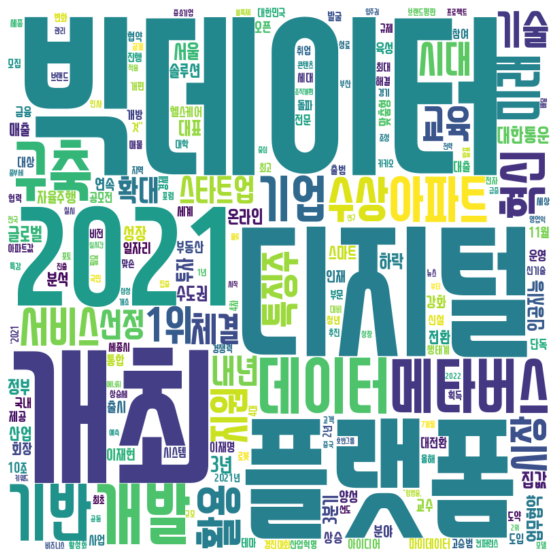

In [26]:
# word cloud
from wordcloud import WordCloud
from collections import Counter

font_path = '/Users/charles/DataAnalysis/data/SDSwaggerTTF.ttf'
wordcloud = WordCloud(font_path=font_path, width=800, height=800, background_color="white")

count = Counter(word_list)
wordcloud = wordcloud.generate_from_frequencies(count)
array = wordcloud.to_array()

fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.axis("off")
plt.savefig('/Users/charles/DataAnalysis/data/wordcloud.png', bbox_inches='tight')